In [ ]:
# Instalar librerias.
!pip install PyPDF2 pdfplumber tensorflow>=2.10.0 numpy>=1.21.0 matplotlib>=3.5.0 ipywidgets>=7.7.0 seaborn scikit-learn pydot streamlit streamlit-drawable-canvas  pillow 


### 1: Instalación de dependencias y configuración inicial

In [ ]:
"""
En esta primera celda configuramos nuestro entorno de trabajo.
Vamos a usar TensorFlow/Keras para implementar nuestra red neuronal.
"""
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Configuración para reproducibilidad
tf.random.set_seed(42)
np.random.seed(42)

# Configuración de matplotlib para mejores gráficos
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("TensorFlow version:", tf.__version__)
print("¡Listo para comenzar!")

### 2: Carga y exploración de los datos MNIST

In [2]:
"""
MNIST es un dataset clásico de dígitos escritos a mano (0-9).
Cada imagen es de 28x28 píxeles en escala de grises.
Conecta con el concepto de TENSORES de la clase teórica.
"""

# Cargar el dataset MNIST (viene incluido en Keras)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("=== EXPLORACIÓN DE DATOS ===")
print(f"Datos de entrenamiento: {x_train.shape}")
print(f"Etiquetas de entrenamiento: {y_train.shape}")
print(f"Datos de prueba: {x_test.shape}")
print(f"Etiquetas de prueba: {y_test.shape}")
print(f"Rango de valores de píxeles: {x_train.min()} - {x_train.max()}")
print(f"Clases únicas: {np.unique(y_train)}")

=== EXPLORACIÓN DE DATOS ===
Datos de entrenamiento: (60000, 28, 28)
Etiquetas de entrenamiento: (60000,)
Datos de prueba: (10000, 28, 28)
Etiquetas de prueba: (10000,)
Rango de valores de píxeles: 0 - 255
Clases únicas: [0 1 2 3 4 5 6 7 8 9]


### 3: Visualización de ejemplos del dataset

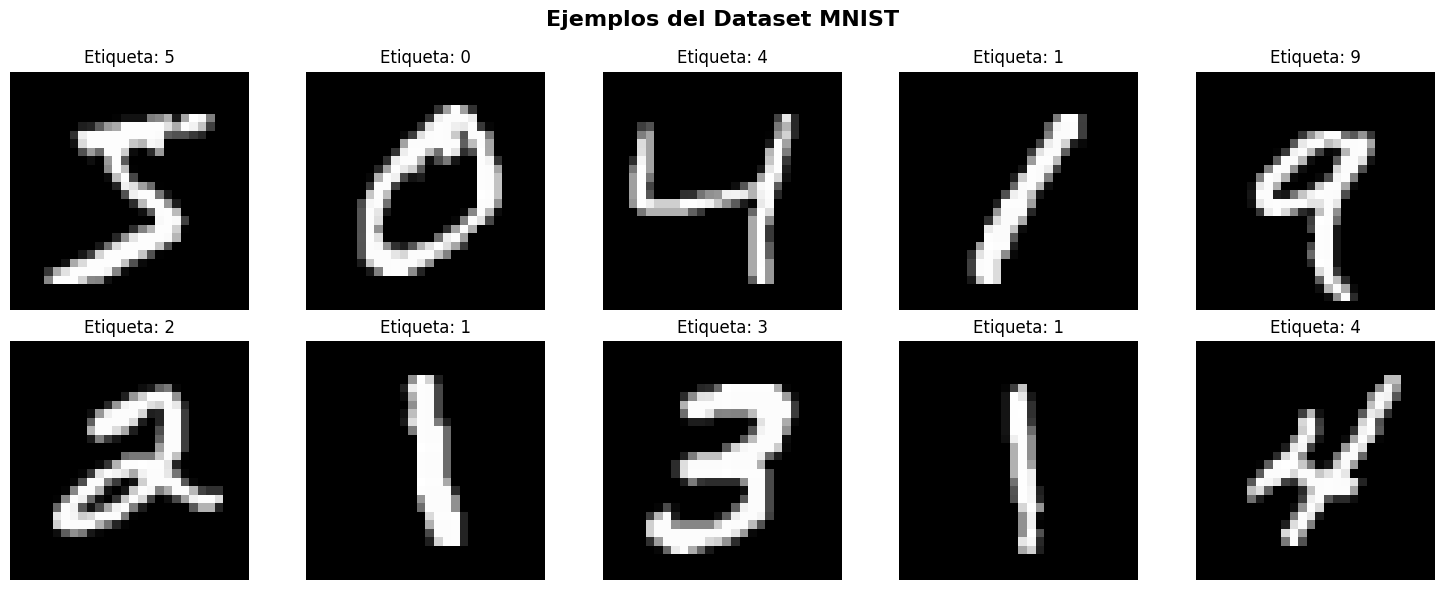

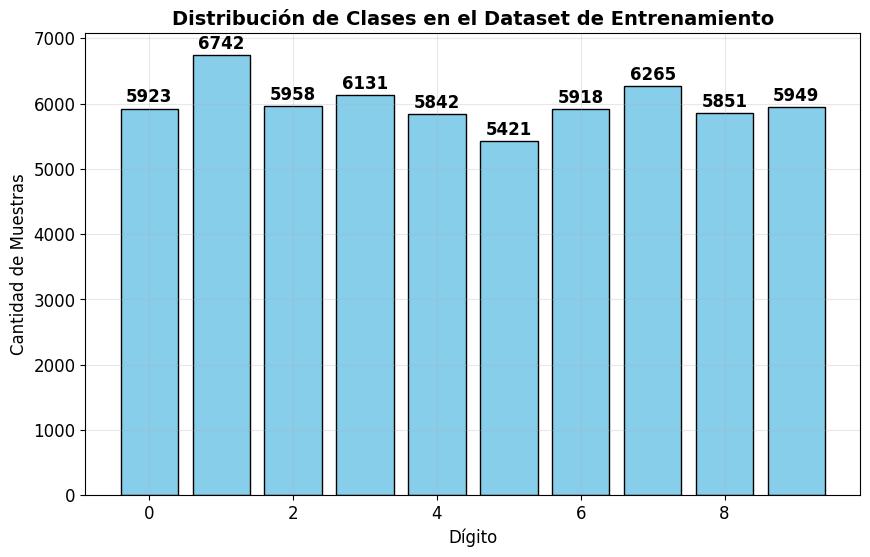

In [3]:
"""
Veamos algunos ejemplos para entender mejor nuestros datos.
Esto nos ayuda a conectar con el concepto de REPRESENTACIONES de datos.
"""

# Crear una figura con varios ejemplos
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Ejemplos del Dataset MNIST', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
    # Mostrar la imagen
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f'Etiqueta: {y_train[i]}', fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Analizar la distribución de clases
plt.figure(figsize=(10, 6))
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts, color='skyblue', edgecolor='black')
plt.title('Distribución de Clases en el Dataset de Entrenamiento', fontsize=14, fontweight='bold')
plt.xlabel('Dígito')
plt.ylabel('Cantidad de Muestras')
plt.grid(True, alpha=0.3)
for i, count in enumerate(counts):
    plt.text(i, count + 100, str(count), ha='center', fontweight='bold')
plt.show()



### 4: Preprocesamiento de datos

In [4]:
"""
Preparamos los datos para el entrenamiento:
1. Normalización: Escalamos los píxeles de [0,255] a [0,1]
2. Reshape: Convertimos matrices 28x28 a vectores de 784 elementos
3. Codificación one-hot: Convertimos etiquetas a formato categórico

Esto conecta con el concepto de REPRESENTACIONES apropiadas.
"""

print("=== PREPROCESAMIENTO DE DATOS ===")

# Guardar las formas originales para referencia
original_shape = x_train.shape
print(f"Forma original de los datos: {original_shape}")

# 1. Normalización: dividir por 255 para obtener valores entre 0 y 1
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# 2. Reshape: convertir de (28, 28) a (784,) - aplanar las imágenes
x_train_flat = x_train_normalized.reshape(x_train_normalized.shape[0], -1)
x_test_flat = x_test_normalized.reshape(x_test_normalized.shape[0], -1)

print(f"Forma después del reshape: {x_train_flat.shape}")
print(f"Nuevo rango de valores: {x_train_flat.min():.3f} - {x_train_flat.max():.3f}")

# 3. Codificación one-hot de las etiquetas
num_classes = 10
y_train_categorical = keras.utils.to_categorical(y_train, num_classes)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes)

print(f"Forma de etiquetas originales: {y_train.shape}")
print(f"Forma de etiquetas categóricas: {y_train_categorical.shape}")

# Mostrar ejemplo de codificación one-hot
print(f"\nEjemplo de codificación one-hot:")
for i in range(3):
    print(f"Etiqueta original: {y_train[i]} -> One-hot: {y_train_categorical[i]}")

=== PREPROCESAMIENTO DE DATOS ===
Forma original de los datos: (60000, 28, 28)
Forma después del reshape: (60000, 784)
Nuevo rango de valores: 0.000 - 1.000
Forma de etiquetas originales: (60000,)
Forma de etiquetas categóricas: (60000, 10)

Ejemplo de codificación one-hot:
Etiqueta original: 5 -> One-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Etiqueta original: 0 -> One-hot: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Etiqueta original: 4 -> One-hot: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


### 5: Construcción del modelo de red neuronal

In [5]:

"""
Construimos un PERCEPTRÓN MULTICAPA (MLP) simple:
- Capa de entrada: 784 neuronas (28x28 píxeles)
- Capa oculta 1: 128 neuronas con activación ReLU
- Capa oculta 2: 64 neuronas con activación ReLU
- Capa de salida: 10 neuronas con activación Softmax

Esto implementa directamente los conceptos de la clase teórica.
"""

print("=== CONSTRUCCIÓN DEL MODELO ===")

# Definir la arquitectura de la red
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,), name='capa_oculta_1'),
    layers.Dense(64, activation='relu', name='capa_oculta_2'),
    layers.Dense(10, activation='softmax', name='capa_salida')
])

# Mostrar resumen del modelo
print("Arquitectura del modelo:")
model.summary()

# Visualizar la arquitectura
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, rankdir='TB')

# Contar parámetros manualmente para entender mejor
print("\n=== ANÁLISIS DE PARÁMETROS ===")
print("Capa 1: 784 entradas × 128 neuronas + 128 sesgos =", 784*128 + 128, "parámetros")
print("Capa 2: 128 entradas × 64 neuronas + 64 sesgos =", 128*64 + 64, "parámetros") 
print("Capa 3: 64 entradas × 10 neuronas + 10 sesgos =", 64*10 + 10, "parámetros")
total_params = (784*128 + 128) + (128*64 + 64) + (64*10 + 10)
print(f"Total calculado: {total_params:,} parámetros")

=== CONSTRUCCIÓN DEL MODELO ===
Arquitectura del modelo:


/Users/clemente/micromamba/envs/diplomado-cenia-py311/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ capa_oculta_1 (Dense)           │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_oculta_2 (Dense)           │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_salida (Dense)             │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.

=== ANÁLISIS DE PARÁMETROS ===
Capa 1: 784 entradas × 128 neuronas + 128 sesgos = 100480 parámetros
Capa 2: 128 entradas × 64 neuronas + 64 sesgos = 8256 parámetros
Capa 3: 64 entradas × 10 neuronas + 10 sesgos = 650 parámetros
Total calculado: 109,386 parámetros


### 6: Compilación del modelo


In [6]:
"""
Configuramos el proceso de entrenamiento:
- Optimizador: Adam (versión avanzada del descenso del gradiente)
- Función de pérdida: Categorical Crossentropy (para clasificación multiclase)
- Métricas: Accuracy (precisión)

Esto implementa los conceptos de OPTIMIZACIÓN BASADA EN GRADIENTES.
"""

print("=== COMPILACIÓN DEL MODELO ===")

# Compilar el modelo
model.compile(
    optimizer='adam',                    # Optimizador Adam
    loss='categorical_crossentropy',     # Función de pérdida para clasificación multiclase
    metrics=['accuracy']                 # Métrica a monitorear
)

print("Configuración del entrenamiento:")
print("- Optimizador: Adam")
print("- Función de pérdida: Categorical Crossentropy") 
print("- Métrica: Accuracy")
print("\n¡Modelo listo para entrenar!")



=== COMPILACIÓN DEL MODELO ===
Configuración del entrenamiento:
- Optimizador: Adam
- Función de pérdida: Categorical Crossentropy
- Métrica: Accuracy

¡Modelo listo para entrenar!


### 7: Entrenamiento del modelo


In [7]:
"""
Entrenamos la red neuronal y monitoreamos el proceso.
Esto implementa el DESCENSO DEL GRADIENTE y la RETROPROPAGACIÓN.
También observaremos las curvas de entrenamiento vs validación.
"""

print("=== ENTRENAMIENTO DEL MODELO ===")

# Entrenar el modelo
print("Iniciando entrenamiento...")
history = model.fit(
    x_train_flat, y_train_categorical,
    batch_size=128,                    # Tamaño del mini-batch
    epochs=15,                         # Número de épocas
    validation_split=0.1,              # 10% para validación
    verbose=1                          # Mostrar progreso
)

print("¡Entrenamiento completado!")

=== ENTRENAMIENTO DEL MODELO ===
Iniciando entrenamiento...


Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8987 - loss: 0.3614 - val_accuracy: 0.9617 - val_loss: 0.1365
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9585 - loss: 0.1421 - val_accuracy: 0.9712 - val_loss: 0.1046
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9708 - loss: 0.0993 - val_accuracy: 0.9728 - val_loss: 0.0955
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9783 - loss: 0.0749 - val_accuracy: 0.9745 - val_loss: 0.0915
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9834 - loss: 0.0577 - val_accuracy: 0.9753 - val_loss: 0.0878
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9872 - loss: 0.0449 - val_accuracy: 0.9772 - val_loss: 0.0844
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9903 - loss: 0.0353 - val_accuracy: 0.9758 - val_loss: 0.0907
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9926 - loss: 0.0279 - val_accuracy: 0.

### 8: Visualización de las curvas de entrenamiento


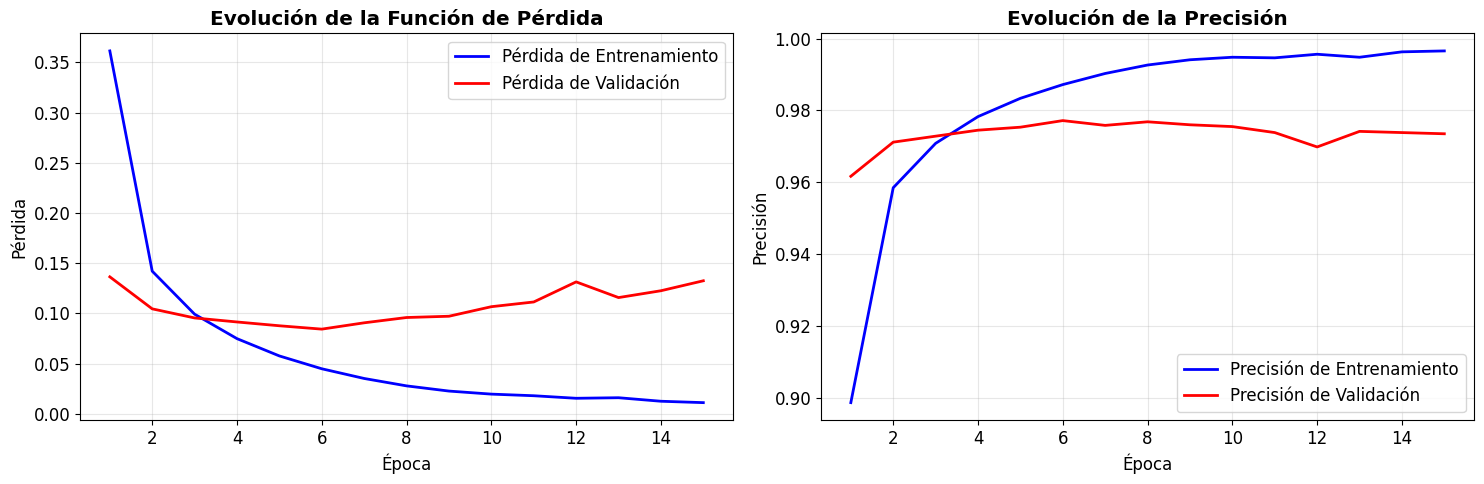

=== ANÁLISIS DE ENTRENAMIENTO ===
Pérdida final de entrenamiento: 0.0112
Pérdida final de validación: 0.1326
Precisión final de entrenamiento: 0.9966
Precisión final de validación: 0.9735

⚠️  Observamos signos de SOBREAJUSTE:
   La pérdida de validación es mayor que la de entrenamiento


In [8]:
"""
Analizamos cómo evolucionó el entrenamiento.
Esto nos permite observar OPTIMIZACIÓN vs GENERALIZACIÓN.
"""

# Extraer métricas del historial
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Crear gráficos de entrenamiento
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de pérdida
ax1.plot(epochs, train_loss, 'b-', label='Pérdida de Entrenamiento', linewidth=2)
ax1.plot(epochs, val_loss, 'r-', label='Pérdida de Validación', linewidth=2)
ax1.set_title('Evolución de la Función de Pérdida', fontweight='bold')
ax1.set_xlabel('Época')
ax1.set_ylabel('Pérdida')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfico de precisión
ax2.plot(epochs, train_accuracy, 'b-', label='Precisión de Entrenamiento', linewidth=2)
ax2.plot(epochs, val_accuracy, 'r-', label='Precisión de Validación', linewidth=2)
ax2.set_title('Evolución de la Precisión', fontweight='bold')
ax2.set_xlabel('Época')
ax2.set_ylabel('Precisión')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis de las curvas
print("=== ANÁLISIS DE ENTRENAMIENTO ===")
print(f"Pérdida final de entrenamiento: {train_loss[-1]:.4f}")
print(f"Pérdida final de validación: {val_loss[-1]:.4f}")
print(f"Precisión final de entrenamiento: {train_accuracy[-1]:.4f}")
print(f"Precisión final de validación: {val_accuracy[-1]:.4f}")

if val_loss[-1] > train_loss[-1]:
    print("\n⚠️  Observamos signos de SOBREAJUSTE:")
    print("   La pérdida de validación es mayor que la de entrenamiento")
else:
    print("\n✅ El modelo está generalizando bien")


### 9: Evaluación en el conjunto de prueba


In [9]:
"""
Evaluamos el rendimiento final del modelo en datos nunca vistos.
Esto mide la capacidad de GENERALIZACIÓN del modelo.
"""

print("=== EVALUACIÓN EN CONJUNTO DE PRUEBA ===")

# Evaluar en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test_categorical, verbose=0)

print(f"Pérdida en conjunto de prueba: {test_loss:.4f}")
print(f"Precisión en conjunto de prueba: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Hacer predicciones
y_pred_probs = model.predict(x_test_flat, verbose=0)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

print(f"\nEjemplos de predicciones:")
for i in range(5):
    true_label = y_test[i]
    pred_label = y_pred_classes[i]
    confidence = y_pred_probs[i][pred_label]
    status = "✅" if true_label == pred_label else "❌"
    print(f"{status} Real: {true_label}, Predicho: {pred_label} (Confianza: {confidence:.3f})")

=== EVALUACIÓN EN CONJUNTO DE PRUEBA ===
Pérdida en conjunto de prueba: 0.1241
Precisión en conjunto de prueba: 0.9717 (97.17%)

Ejemplos de predicciones:
✅ Real: 7, Predicho: 7 (Confianza: 1.000)
✅ Real: 2, Predicho: 2 (Confianza: 1.000)
✅ Real: 1, Predicho: 1 (Confianza: 1.000)
✅ Real: 0, Predicho: 0 (Confianza: 1.000)
✅ Real: 4, Predicho: 4 (Confianza: 1.000)


### 10: Matriz de confusión y análisis detallado


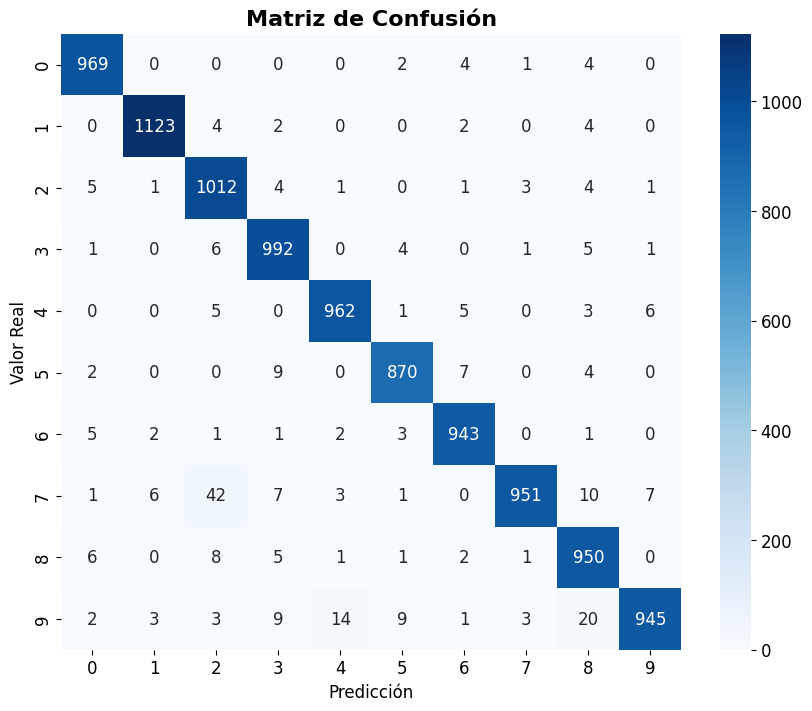

=== REPORTE DE CLASIFICACIÓN ===
              precision    recall  f1-score   support

    Dígito 0       0.98      0.99      0.98       980
    Dígito 1       0.99      0.99      0.99      1135
    Dígito 2       0.94      0.98      0.96      1032
    Dígito 3       0.96      0.98      0.97      1010
    Dígito 4       0.98      0.98      0.98       982
    Dígito 5       0.98      0.98      0.98       892
    Dígito 6       0.98      0.98      0.98       958
    Dígito 7       0.99      0.93      0.96      1028
    Dígito 8       0.95      0.98      0.96       974
    Dígito 9       0.98      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [10]:
"""
Analizamos qué tan bien clasifica cada dígito el modelo.
La matriz de confusión nos muestra dónde se equivoca más.
"""

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)

# Visualizar matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Matriz de Confusión', fontsize=16, fontweight='bold')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Reporte de clasificación
print("=== REPORTE DE CLASIFICACIÓN ===")
print(classification_report(y_test, y_pred_classes, 
                          target_names=[f'Dígito {i}' for i in range(10)]))

### 11: Visualización de predicciones correctas e incorrectas

Predicciones correctas: 9717 (97.2%)
Predicciones incorrectas: 283 (2.8%)


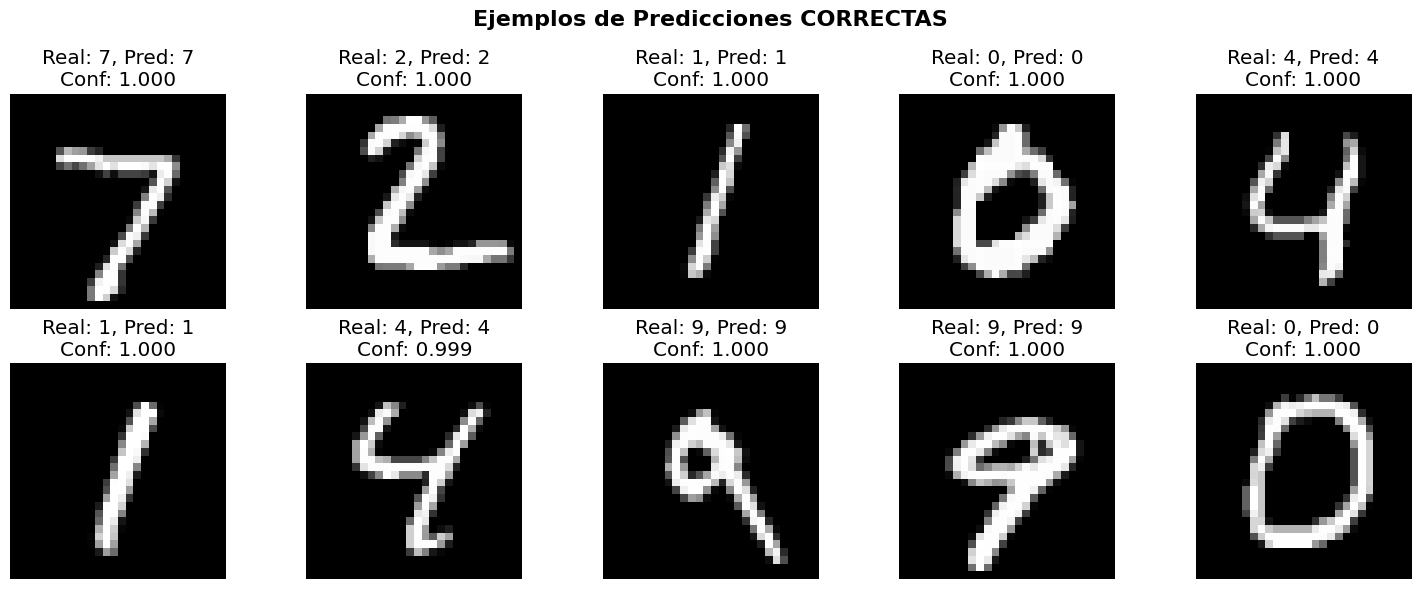

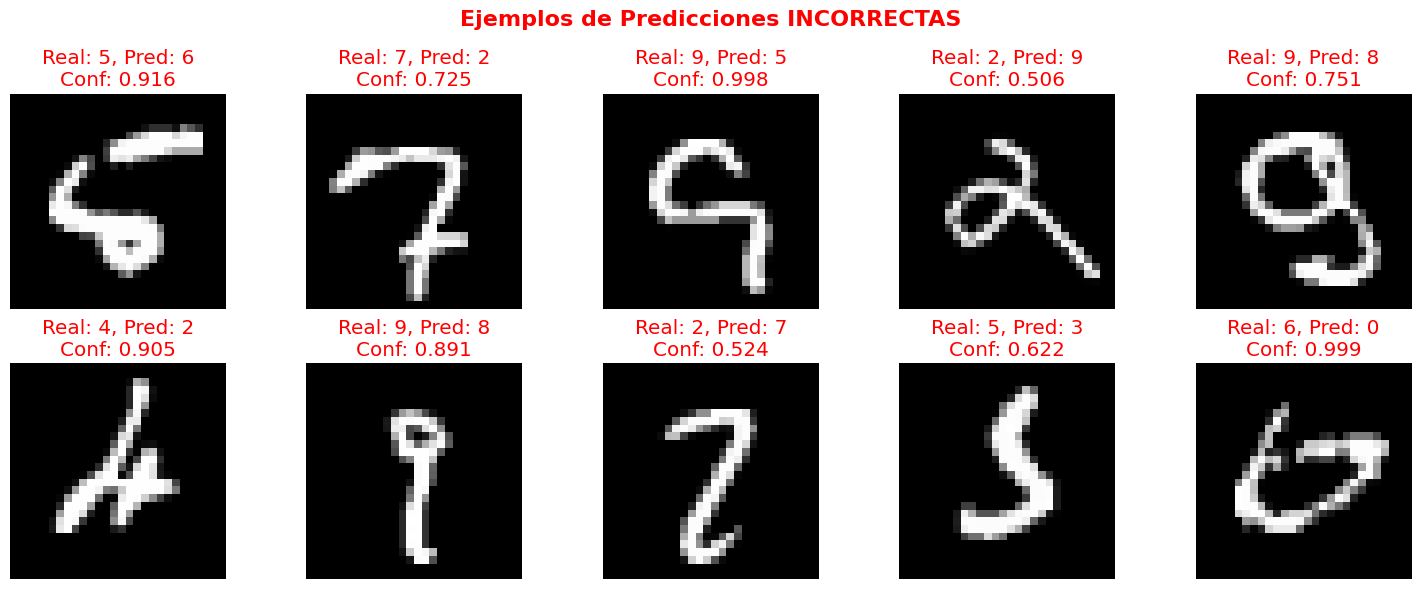

In [11]:
"""
Veamos ejemplos específicos de predicciones para entender mejor 
el comportamiento del modelo.
"""

# Encontrar ejemplos correctos e incorrectos
correct_indices = np.where(y_pred_classes == y_test)[0]
incorrect_indices = np.where(y_pred_classes != y_test)[0]

print(f"Predicciones correctas: {len(correct_indices)} ({len(correct_indices)/len(y_test)*100:.1f}%)")
print(f"Predicciones incorrectas: {len(incorrect_indices)} ({len(incorrect_indices)/len(y_test)*100:.1f}%)")

# Visualizar ejemplos correctos
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Ejemplos de Predicciones CORRECTAS', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
    idx = correct_indices[i]
    ax.imshow(x_test[idx], cmap='gray')
    pred_prob = y_pred_probs[idx][y_pred_classes[idx]]
    ax.set_title(f'Real: {y_test[idx]}, Pred: {y_pred_classes[idx]}\nConf: {pred_prob:.3f}')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Visualizar ejemplos incorrectos
if len(incorrect_indices) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle('Ejemplos de Predicciones INCORRECTAS', fontsize=16, fontweight='bold', color='red')
    
    for i, ax in enumerate(axes.flat):
        if i < len(incorrect_indices):
            idx = incorrect_indices[i]
            ax.imshow(x_test[idx], cmap='gray')
            pred_prob = y_pred_probs[idx][y_pred_classes[idx]]
            ax.set_title(f'Real: {y_test[idx]}, Pred: {y_pred_classes[idx]}\nConf: {pred_prob:.3f}', 
                        color='red')
            ax.axis('off')
        else:
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

### 12: Experimento - Demostración de sobreajuste


=== EXPERIMENTO: DEMOSTRACIÓN DE SOBREAJUSTE ===
Entrenando con solo 1000 muestras para mostrar sobreajuste...


/Users/clemente/micromamba/envs/diplomado-cenia-py311/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


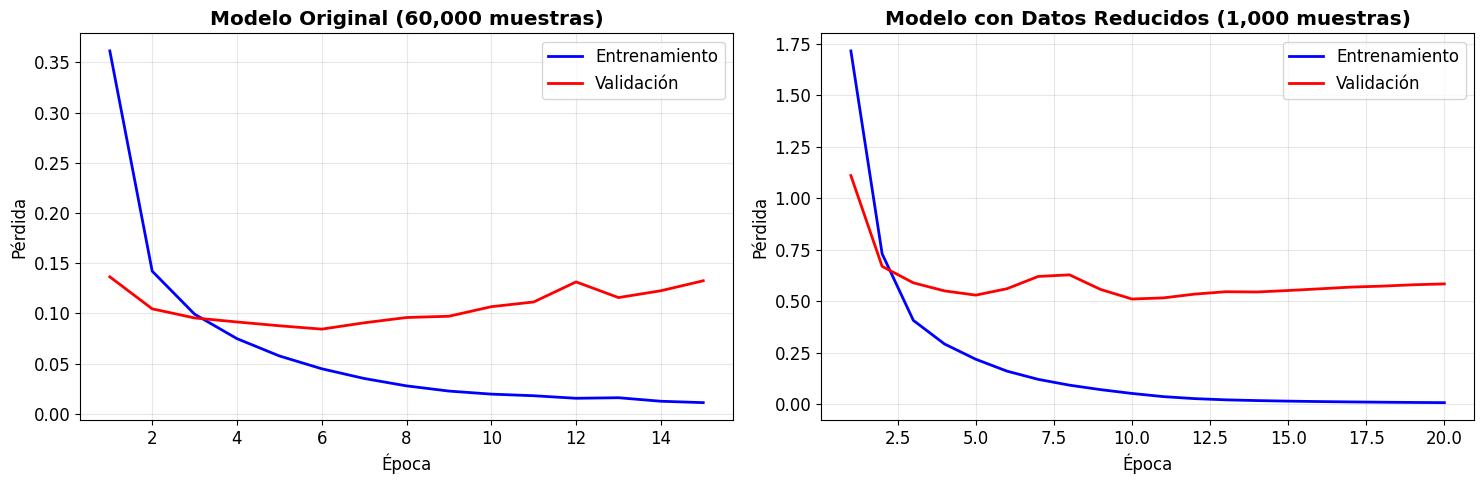

=== COMPARACIÓN DE RESULTADOS ===
Modelo original:
  - Datos de entrenamiento: 54,000 muestras
  - Precisión en prueba: 0.9717 (97.17%)

Modelo con datos reducidos:
  - Datos de entrenamiento: 800 muestras
  - Precisión en prueba: 0.8833 (88.33%)

Diferencia: 8.84 puntos porcentuales

 OBSERVACIÓN: Con menos datos, el modelo generaliza peor.
   Esto demuestra la importancia de tener suficientes datos de entrenamiento.


In [12]:
"""
Demostremos el concepto de SOBREAJUSTE entrenando con menos datos.
Esto conecta directamente con la teoría de optimización vs generalización.
"""

print("=== EXPERIMENTO: DEMOSTRACIÓN DE SOBREAJUSTE ===")
print("Entrenando con solo 1000 muestras para mostrar sobreajuste...")

# Crear un dataset reducido
n_samples = 1000
x_small = x_train_flat[:n_samples]
y_small = y_train_categorical[:n_samples]

# Crear un modelo idéntico
model_overfit = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_overfit.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar con datos reducidos
history_overfit = model_overfit.fit(
    x_small, y_small,
    batch_size=32,
    epochs=20,
    validation_split=0.2,
    verbose=0  # Silencioso para no saturar output
)

# Comparar curvas de entrenamiento
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Modelo original
epochs_orig = range(1, len(history.history['loss']) + 1)
ax1.plot(epochs_orig, history.history['loss'], 'b-', label='Entrenamiento', linewidth=2)
ax1.plot(epochs_orig, history.history['val_loss'], 'r-', label='Validación', linewidth=2)
ax1.set_title('Modelo Original (60,000 muestras)', fontweight='bold')
ax1.set_xlabel('Época')
ax1.set_ylabel('Pérdida')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Modelo con datos reducidos
epochs_small = range(1, len(history_overfit.history['loss']) + 1)
ax2.plot(epochs_small, history_overfit.history['loss'], 'b-', label='Entrenamiento', linewidth=2)
ax2.plot(epochs_small, history_overfit.history['val_loss'], 'r-', label='Validación', linewidth=2)
ax2.set_title('Modelo con Datos Reducidos (1,000 muestras)', fontweight='bold')
ax2.set_xlabel('Época')
ax2.set_ylabel('Pérdida')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Evaluar el modelo con datos reducidos
test_loss_small, test_accuracy_small = model_overfit.evaluate(x_test_flat, y_test_categorical, verbose=0)

print("=== COMPARACIÓN DE RESULTADOS ===")
print(f"Modelo original:")
print(f"  - Datos de entrenamiento: 54,000 muestras")
print(f"  - Precisión en prueba: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"\nModelo con datos reducidos:")
print(f"  - Datos de entrenamiento: 800 muestras")  
print(f"  - Precisión en prueba: {test_accuracy_small:.4f} ({test_accuracy_small*100:.2f}%)")
print(f"\nDiferencia: {(test_accuracy - test_accuracy_small)*100:.2f} puntos porcentuales")

if test_accuracy_small < test_accuracy:
    print("\n OBSERVACIÓN: Con menos datos, el modelo generaliza peor.")
    print("   Esto demuestra la importancia de tener suficientes datos de entrenamiento.")

### 12.5: Guardamos los pesos del modelo

In [13]:
"""
Guardamos el modelo para poder usarlo posteriormente en aplicaciones.
"""
# Guardar modelo completo
model.save('modelo_mnist_diplomado.h5')
print("✅ Modelo guardado como 'modelo_mnist_diplomado.h5'")

# También podemos guardar solo los pesos si queremos
model.save_weights('pesos_mnist_diplomado.weights.h5') 
print("✅ Pesos guardados como 'pesos_mnist_diplomado.weights.h5'")

✅ Modelo guardado como 'modelo_mnist_diplomado.h5'
✅ Pesos guardados como 'pesos_mnist_diplomado.weights.h5'


### 13: Conclusiones y conceptos clave


In [14]:
"""
Resumamos los conceptos clave de la clase que hemos implementado prácticamente.
"""

print("="*60)
print("RESUMEN DE CONCEPTOS IMPLEMENTADOS")
print("="*60)

print("""
TENSORES Y REPRESENTACIÓN DE DATOS:
   ✓ Imágenes como tensores de rango 2 (28×28)
   ✓ Conversión a vectores para capas densas (784 elementos)
   ✓ Normalización para mejor optimización

ARQUITECTURA DE RED NEURONAL (MLP):
   ✓ Capas densas con conexiones completas
   ✓ Función de activación ReLU en capas ocultas
   ✓ Función de activación Softmax en salida

OPTIMIZACIÓN BASADA EN GRADIENTES:
   ✓ Función de pérdida: Categorical Crossentropy
   ✓ Optimizador Adam (descenso del gradiente)
   ✓ Retropropagación automática

GENERALIZACIÓN Y SOBREAJUSTE:
   ✓ División en entrenamiento/validación/prueba
   ✓ Monitoreo de curvas de pérdida
   ✓ Demostración práctica de sobreajuste

MÉTRICAS Y EVALUACIÓN:
   ✓ Precisión (accuracy)
   ✓ Matriz de confusión
   ✓ Análisis de errores
""")

print("="*60)
print("PUNTOS PARA RECORDAR:")
print("="*60)
print("""
1. Los datos son PRIMORDIALES - más y mejores datos → mejor generalización
2. El sobreajuste ocurre cuando el modelo memoriza en lugar de generalizar
3. Las representaciones adecuadas facilitan el aprendizaje
4. La validación nos ayuda a detectar problemas de generalización
5. Las redes neuronales aprenden mediante transformaciones geométricas
""")

print("\n Hemos implementado tu primera red neuronal desde cero.")
print("   Ahora entiendes cómo funcionan los conceptos teóricos en la práctica.")

RESUMEN DE CONCEPTOS IMPLEMENTADOS

TENSORES Y REPRESENTACIÓN DE DATOS:
   ✓ Imágenes como tensores de rango 2 (28×28)
   ✓ Conversión a vectores para capas densas (784 elementos)
   ✓ Normalización para mejor optimización

ARQUITECTURA DE RED NEURONAL (MLP):
   ✓ Capas densas con conexiones completas
   ✓ Función de activación ReLU en capas ocultas
   ✓ Función de activación Softmax en salida

OPTIMIZACIÓN BASADA EN GRADIENTES:
   ✓ Función de pérdida: Categorical Crossentropy
   ✓ Optimizador Adam (descenso del gradiente)
   ✓ Retropropagación automática

GENERALIZACIÓN Y SOBREAJUSTE:
   ✓ División en entrenamiento/validación/prueba
   ✓ Monitoreo de curvas de pérdida
   ✓ Demostración práctica de sobreajuste

MÉTRICAS Y EVALUACIÓN:
   ✓ Precisión (accuracy)
   ✓ Matriz de confusión
   ✓ Análisis de errores

PUNTOS PARA RECORDAR:

1. Los datos son PRIMORDIALES - más y mejores datos → mejor generalización
2. El sobreajuste ocurre cuando el modelo memoriza en lugar de generalizar
3. La